# LAB05-1 - Metaheuristics

**Objective:** Students will practice

*   Using simpleAI library for search, local search and Constraint Satisfaction problems
*   Get understand how the algorithm of simulated annealing works.
*   Get understand how the algorithm of genetic algorithm works.


**Lab Instruction**

---

*   The **LAB05-1** instruction and lab resources are shared in the MSTeam platform (**LAB05-1_Metaheuristics**.ipynb) 
*   Student has to '**save a copy in Drive**'. After that you can edit the code in your own drive.
*   There are **4 tasks** according to the **LAB05-1** sheet posted on the channel.
*   The **LAB05** is worth **12 points** in total.

---

**Assignment Submission:**
Once you have done all assignment, on COLAB,
*   Goto: File --> Download --> Download .ipynb
*   Save the filename as **LAB05-1_Metaheuristics_[your_student_ID]_inclass.ipynb** for the work that you finished in the class
*   Save the filename as **LAB05-1_Metaheuristics_[your_student_ID]_outclass.ipynb** for the work that you finished after the class
*   Upload your code files to MS Team assignments. The submission later than the ‘due date’ will get 50% off your score. You cannot submit your work to the system at the close date.
>*   **Be careful**: The uploaded time will be checked. If you replace the inclass file on the later upload, you score will be graded by the uploaded time.




# SimpleAI library for search problems

Instruction: 
1. Browse https://simpleai.readthedocs.io/en/latest/
2. Install simpleAI package to your python environment
3. Run the following code to test the simpleAI search

In [4]:
from simpleai.search import SearchProblem, astar, greedy
from simpleai.search.viewers import BaseViewer


my_viewer = BaseViewer()

GOAL = 'HELLO WORLD'


class HelloProblem(SearchProblem):
    def actions(self, state):
        if len(state) < len(GOAL):
            return list(' ABCDEFGHIJKLMNOPQRSTUVWXYZ')
        else:
            return []

    def result(self, state, action):
        return state + action

    def is_goal(self, state):
        return state == GOAL

    def heuristic(self, state):
        # how far are we from the goal?
        wrong = sum([1 if state[i] != GOAL[i] else 0
                    for i in range(len(state))])
        missing = len(GOAL) - len(state)
        return wrong + missing

problem = HelloProblem(initial_state='')
#result = astar(problem,viewer=my_viewer)
result = greedy(problem,viewer=my_viewer)


print('\nTarget string: ', GOAL)
print("\nPath to the solution:")
for item in result.path():
    print(item)

print(my_viewer.stats)
    
print(result.state)
print(result.path())



Target string:  HELLO WORLD

Path to the solution:
(None, '')
('H', 'H')
('E', 'HE')
('L', 'HEL')
('L', 'HELL')
('O', 'HELLO')
(' ', 'HELLO ')
('W', 'HELLO W')
('O', 'HELLO WO')
('R', 'HELLO WOR')
('L', 'HELLO WORL')
('D', 'HELLO WORLD')
{'max_fringe_size': 287, 'visited_nodes': 12, 'iterations': 12}
HELLO WORLD
[(None, ''), ('H', 'H'), ('E', 'HE'), ('L', 'HEL'), ('L', 'HELL'), ('O', 'HELLO'), (' ', 'HELLO '), ('W', 'HELLO W'), ('O', 'HELLO WO'), ('R', 'HELLO WOR'), ('L', 'HELLO WORL'), ('D', 'HELLO WORLD')]


## **Task-1** [2 points]

Q1. Describe how does the function 'heuristic()' defined in the code above compute? Give an example of computation.
 
**ANSWER here**: 

   `it returns wrong + missing `

   ` where wrong = sum of entries in state array that aren't matched with goal array`

   ` and missing = difference between the length of state array and goal array`


## **Task-2** [2 points]

1. Study how is the 'Search' library works. https://simpleai.readthedocs.io/en/latest/search_problems.html
2. Change the search GOAL = 'Hello World' [letters are different from the example]
3. Modify the search algorithm to be **'greedy'** 
    - *You should check source code of the algorithm in the document. Each algorithm specify the list of required elements for executing the function.*

In [ ]:
## Add your code here



# Constraint Satisfaction problem (CSP)

Study CSP problems in the library
https://simpleai.readthedocs.io/en/latest/constraint_satisfaction_problems.html

**CspProblem(variables, domains, constraints)**: 
Using the constraint satisfaction search from simpleAI library, you have to define variables, domains and constraints

### The VARIABLE names as KEYS, and the DOMAINS as VALUES for the computing under CONSTRAINTS



The following problem is to sort the name list by constraints.

The name list are  ('John', 'Anna', 'Tom', 'Patricia')
The order number can be [1,2,3,4]

Constraints:
1. expecting that all the name must have a different order number 
2. some name should be in a higher order than the other one
3. some name should be in the odd order and the other name should in the even order

In [ ]:
from simpleai.search import CspProblem, backtrack, min_conflicts, \
    MOST_CONSTRAINED_VARIABLE, HIGHEST_DEGREE_VARIABLE, LEAST_CONSTRAINING_VALUE

# variables will be a tuple with the variable names.
variables =  ('John', 'Anna', 'Tom', 'Patricia')

#domains will be a dictionary with the variable names as keys, and the domains as values
domains = {
    'John': [1,2,3,4],
    'Anna': [1,3],
    'Tom' : [2,4],
    'Patricia': [1,2,3]
}

# Define the first constraint
def  constraint_unique(variables, values):
    return len(values) == len(set(values))

# Define the second constraint
def constraint_bigger(variables, values):
    return values[0] > values[1]

# Define the third constraint
def constraint_odd_even(variables, values):
    if values[0] % 2 == 0:
        return values[1] % 2 == 1
    else:
        return values[1] % 2 == 0

# constraints will be a list of tuples with two components each: a tuple with the variables involved on the constraint,
#  and a reference to a function that checks the constraint.
constraints = [
    # (('John','Anna','Tom'), constraint_unique),
    # (('Tom','Anna'), constraint_bigger),
    # (('John', 'Patricia'), constraint_odd_even)
    (('John','Anna','Tom','Patricia'), constraint_unique),
    (('Anna','Patricia'), constraint_bigger),
    (('John','Tom'), constraint_odd_even)
]

problem = CspProblem(variables, domains, constraints)

result = backtrack(problem)

for k,v in result.items():
    print(k, '==>', v)


John ==> 1
Anna ==> 3
Tom ==> 4
Patricia ==> 2


## **Task-3** [6 points]

**Problem**: the following map showing in the picture are regionized by names. Each region should have a different color from the connecting regions.

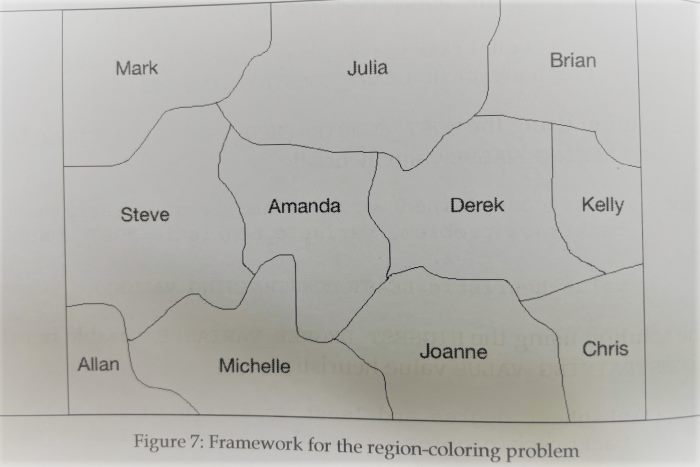


1. [1 point] define the name list in 'variable_names' 
2. the domains is given: 

        domain_colors = dict ((variable_name, ['red', 'green', 'blue','gray']))

3. the constraint function is given: 

        def constraint_func(variable_names, values):
            return values[0] != values[1]
    
    note: 'values' are derived from the domains.

4. [2 points] define constraints = [...] ; hint: considered based on the constraint function
5. [1 point] define the CspProblem()
6. [1 point] print result


The result should be like: 

Derek ==> blue

Michelle ==> gray

Allan ==> red

Steve ==> blue

...

In [ ]:
## put your code here





# Simulated Annealing

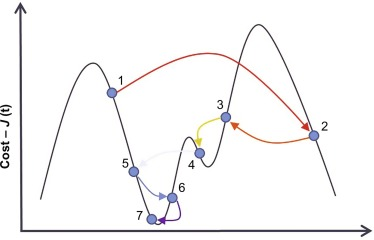

**Annealing process** - the temperature of material is increased to diffuse the temperature and atoms can travel in long paths. Then it is cooled down in a slow manner to let the atom diffusion reach to an equilibrium state.



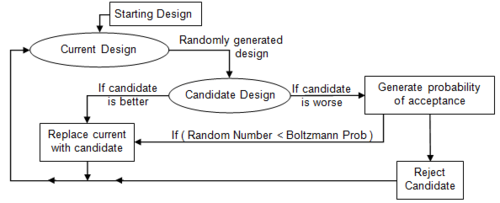

http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing

Notice in the flow of 'Candidate Design'


*   If the candidate has better evaluation, the current state will be replaced with the candidate as the new state for the next loop.
*   If the candidate has worse evaluation, the probability will be calculated whether to accept or reject the candidate.

E.g. from the graph above, from point-1 to point-2, the evaluation is better



**Simulated annealing algorithm **
First, define an objective function 'objective()' or a cost function

At start, an initial point is randomly selected and evaluated for the objective/cost value.

On each loop,
- a candidate point is randomly selected and evaluated for the objective/cost value.
- if candidate value is less than the best value (better evaluation), candidate is accepted to be the new 'current state' for the next loop.
- if candidate value is higher than the best value (worse evaluation), the probability is computed. The more higher of candidate value, the less chance of probability that the candidate will be accepted to be the new 'current state' for the next loop.

Temperature is gradually reduced to a lower value in steps.

In [ ]:
# Problem: to find the number from the range of input data that has lowest exponential value

# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# specify the random seed the pseudorandom number generator
# seed() method is used to initialize the random number generator
seed(1)

# define the range for input
bounds = asarray([[-5.0, 5.0]])

# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10

# objective function
def objective(x):
	return x[0]**2.0  # '**' ; exponential

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):

	# randomly select an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)

	# the initial point is as the current state and the best state for now
	curr, curr_eval = best, best_eval

	# run the algorithm
	for i in range(n_iterations):

		# from current state, take a step in random to find the next state
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)

    # check for new best solution; aim to find the lowest point
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))

    # to calculate the likelihood of accepting a solution with worse performance
		# 1. difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval

    # 2. reduce temperature for each epoch (loop iteration)
	# to control the temperature (temperature scheduling)
		t = temp / float(i + 1)

		# 3. metropolis acceptance criterion is used as probability of acceptance
    # the far worse evaluation of candidate, the less value of metropolis value
		metropolis = exp(-diff / t)

		# 4. check if we should keep the new point
    # if candidate is lower than the current state (better evaluation), accept
    # if the random value is less than metropolis (worse evaluation), accept
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval]


# perform the simulated annealing search
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000


The algorithm of `simulated_annealing(objective, bounds, n_iterations, step_size, temp)` can be used for others problems by changing the objective function, bounds of the input ranges, step_size for selecting the next state and temperature(to control the probability of acceptance)

Code in the example is configurable for your problem requirement!
E.g. bounds, step_size, temperature

## **Task-4** [2 points]

### **Task-4.1**: 
on the output, there are loops that do not print out values in the console. Explain what happen to those candidates. [2 points]

**Answer here**:



